In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.special import inv_boxcox

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/accountmanager/Desktop/customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Exploring the data

In [2]:
df.shape

(7043, 21)

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# checking the nulls

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [6]:
# I just rename all of it

df.set_axis(['customer_id','gender', 'senior_citizen','partner','dependents','tenure','phone_service','multiple_lines','internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','contract','paperless_billing','payment_method','monthly_charges','total_charges','churn'], axis='columns', inplace=True)


In [7]:
df = df.set_index('customer_id')

In [8]:
df.value_counts('senior_citizen')

senior_citizen
0    5901
1    1142
dtype: int64

In [9]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
customer_id,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df['churn'] = df['churn'].replace({"Yes": 1, "No": 0})

In [11]:
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [12]:
df['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [13]:
df.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                  int64
dtype: object

### Extract the variable

In [14]:
X = df[['tenure','senior_citizen','monthly_charges']]
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling

In [15]:
from sklearn.preprocessing import Normalizer

numericals2 = X.select_dtypes(np.number)

transformer = Normalizer()
transformer.fit(numericals2)
x_normalized = transformer.transform(numericals2)

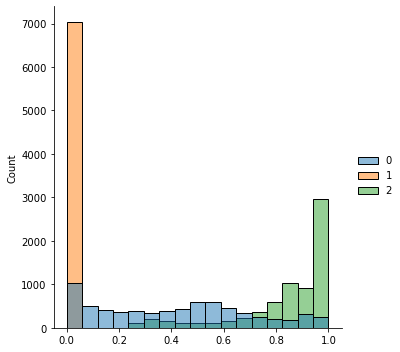

In [16]:
sns.displot(x_normalized)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.score(X_test, y_test) # I do not have 70% accuracy here

0.23661024989601975

### imblearn.over_sampling.SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm = SMOTE(random_state=42)

In [22]:
X, y = df[['tenure','senior_citizen','monthly_charges']], df['churn']

In [23]:
X_res, y_res = sm.fit_resample(X, y)

In [24]:
lr = LinearRegression()
lr.fit(X_res, y_res)

LinearRegression()

In [25]:
lr.score(X_test, y_test) # no improvement at all

0.07861179812345853

### imblearn.under_sampling.TomekLinks

In [26]:
from imblearn.under_sampling import TomekLinks

In [27]:
np.random.seed(42)
tl = TomekLinks(sampling_strategy='auto')
X_res, y_res = tl.fit_resample(X, y)

In [28]:
X, y = df[['tenure','senior_citizen','monthly_charges']], df['churn']

In [29]:
X_res, y_res = tl.fit_resample(X, y)

In [30]:
lr = LinearRegression()
lr.fit(X_res, y_res)

LinearRegression()

In [31]:
lr.score(X_test, y_test) # a bit better but still less than the other one

0.23488820363113516